# For other

In [ ]:
# https://stackoverflow.com/questions/28995146/matlab-ind2sub-equivalent-in-python


# Init

In [5]:
import librosa
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt, gridspec

In [2]:
tes, sr=librosa.load("tes.wav", sr=None)
ten, sr=librosa.load("ten.wav", sr=None)
tex = tes+ten

trs, sr=librosa.load("trs.wav", sr=None)
trn, sr=librosa.load("trn.wav", sr=None)
trx = trs+trn

In [3]:
sz = 1024
hp = 512
wn = 'hann'

In [4]:
trS = abs(librosa.stft(trs, n_fft=sz, hop_length=hp, window=wn))
trN = abs(librosa.stft(trn, n_fft=sz, hop_length=hp, window=wn))
trX = abs(librosa.stft(trx, n_fft=sz, hop_length=hp, window=wn))
teX = librosa.stft(tex, n_fft=sz, hop_length=hp, window=wn)

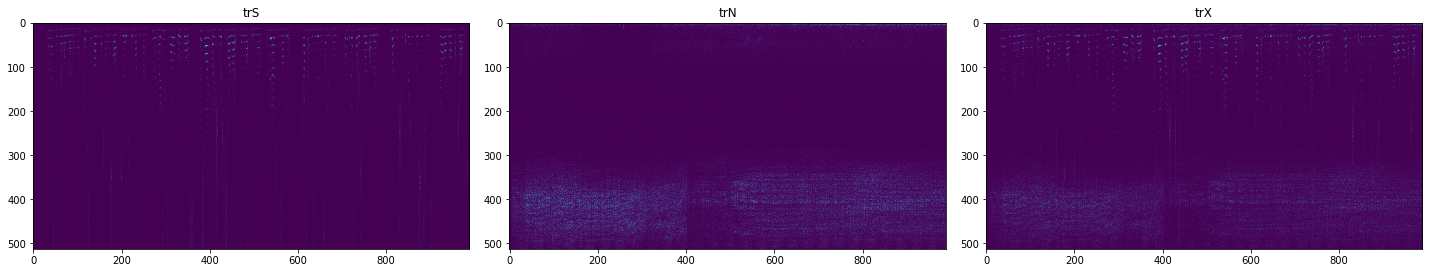

In [17]:
f, a0 = plt.subplots(1,3,figsize=(20, 12))
a0[0].imshow(trS); a0[0].set_title('trS')
a0[1].imshow(trN); a0[1].set_title('trN')
a0[2].imshow(trX); a0[2].set_title('trX')
f.tight_layout()

Text(0.5, 1.0, 'IBM')

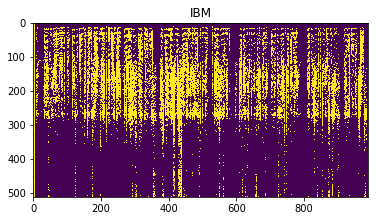

In [27]:
IBM = 1*(trS > trN)
plt.imshow(IBM); plt.title("IBM")

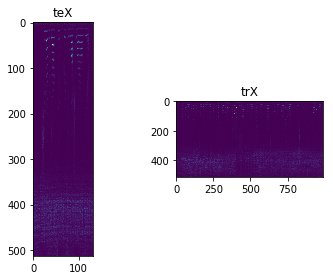

In [50]:
gs = gridspec.GridSpec(1, 2, width_ratios=[2,1])
plt.subplot(gs[0])
plt.imshow(abs(teX))
plt.title('teX')
plt.subplot(gs[1])
plt.imshow(trX)
plt.title('trX')
plt.tight_layout()

# kNN: get distance between test data and training data

### Make own:

Text(0.5, 1.0, 'D')

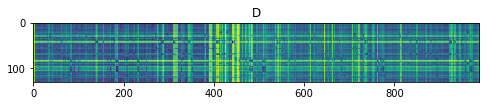

In [37]:
D = cdist(abs(teX).T,trX.T,'cosine')
f, a0 = plt.subplots(1,1,figsize=(8, 8))
a0.imshow(D); a0.set_title("D")

In [83]:
Ds, DsIdx = np.sort(D,1), np.argsort(D,1)

In [84]:
K = 5

In [88]:
kNNIdx = DsIdx[:, :K]
kNNIdx1D = np.reshape(kNNIdx, -1)

In [103]:
IBM3D = IBM[:,kNNIdx1D]
IBM3D = np.reshape(IBM3D, [513, K, -1])
IBMEstMed = np.median(IBM3D, 1)
IBMEstMean = np.mean(IBM3D, 1)

In [114]:
yhat1 = librosa.istft(teX*IBMEstMed, hop_length=hp, window=wn)
yhat2 = librosa.istft(teX*IBMEstMean, hop_length=hp, window=wn)

In [116]:
def SDR(s,sr):
    eps=1e-20
    ml=np.minimum(len(s), len(sr))
    s=s[:ml]
    sr=sr[:ml]
    return ml, 10*np.log10(np.sum(s**2)/(np.sum((s-sr)**2)+eps)+eps)

In [117]:
SDR(yhat1, yhat2)

(66560, 5.351284471964779)

In [120]:
SDR(tes, tex)

(66560, -0.9322031636986516)